In [1]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import os
import datetime
import numpy as np
from snowpack_functions import unpack_netcdf_file_var
import seaborn as sns
import pandas as pd
# basins = ["cascades","california","northernrockies","southernrockies","whites","plains","nwinterior","coastalnorth","coastalsouth","southwest"]
basins = ["missouri","nwinterior","coastalnorth","coastalsouth","lower_colorado","great_basin"]
scenarios = ["historical","rcp45","rcp85"]
variables=["soilmoisture"]
models = ['CNRM-CM5','NorESM1-M','IPSL-CM5A-MR','CanESM2','CCSM4','HadGEM2-CC365','HadGEM2-ES365','MIROC5','bcc-csm1-1-m',
          'CSIRO-Mk3-6-0']
basins = ["cascades","california","northernrockies","southernrockies","whites","missouri",
          "nwinterior","coastalnorth","coastalsouth","lower_colorado","great_basin"]
models = ['CNRM-CM5','NorESM1-M','IPSL-CM5A-MR','CanESM2','CCSM4','HadGEM2-CC365','HadGEM2-ES365','MIROC5','bcc-csm1-1-m',
          'CSIRO-Mk3-6-0']
basins_corr_formatting = ["Cascades","Sierra Nevada","Northern Rockies","Southern Rockies","White Mountains","Missouri",
          "Northwest Interior","Coastal North","Coastal South","Lower Colorado","Great Basin"]
basins_10 = np.asarray(basins_corr_formatting*10)
models_10 = np.asarray(models*11).reshape(11,10).T.ravel()

/usr/local/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
direc = '/raid9/gergel/agg_snowpack/sm_summer/'
file = '%s_%s_%s.npz' % ("cascades","CCSM4","historical")
data = np.load(os.path.join(direc,file))
u = data['sm']
u.shape

(56,)

SOIL MOISTURE HEATMAP: CHANGE IN DRIEST YEARS NORMALIZED (Figure 11) 

In [3]:

'''lt = 25
rt = 18

fig = plt.figure(figsize=(lt,rt))
f = ".2f"

scenario = "rcp45"

diff_means = list()
for model in models: 
    for basin in basins: 
        direc = '/raid9/gergel/agg_snowpack/sm_summer/'
        file = '%s_%s_%s.npz' % (basin,model,"historical")
        data = np.load(os.path.join(direc,file))
        sm_hist = data['sm']
        sm_hist = sm_hist.mean(axis=(1,2))*1000000
        sm_hist = sm_hist[20:-6]
        sm_hist_mean = np.percentile(sm_hist,10)

        file = '%s_%s_%s.npz' % (basin,model,scenario)
        data = np.load(os.path.join(direc,file))
        sm = data['sm']
        sm = sm.mean(axis=(1,2))*1000000
        sm_mean = np.percentile(sm[4:34],10) ## 2020s 
        
        diff_means.append(sm_mean - sm_hist_mean)
        
diff_means = np.asarray(diff_means)

d = {'GCMs': models_10, 'Regions': basins_10, 'means': diff_means}
df = pd.DataFrame(data=d,index=np.arange(110))
df_pivot = df.pivot("Regions", "GCMs", "means")
# df_pivot = df_pivot.reindex_axis(['cascades', 'california', 'northernrockies','southernrockies','whites','plains','nwinterior','coastalnorth','coastalsouth','southwest'], axis=0)
df_pivot = df_pivot.reindex_axis(["Cascades","Sierra Nevada","Northern Rockies","Southern Rockies","White Mountains","Missouri",
                                  "Northwest Interior","Coastal North","Coastal South","Lower Colorado","Great Basin"], 
                                 axis=0)

ax = fig.add_subplot(2,3,1)
# sns.heatmap(df_pivot, annot=True, fmt="d", linewidths=.5)
sns.heatmap(df_pivot, annot=True, fmt=f, linewidths=.5,cmap='RdBu',cbar_kws={"extend": 'min'})

#############################################################

diff_means = list()
for model in models: 
    for basin in basins: 
        direc = '/raid9/gergel/agg_snowpack/sm_summer/'
        file = '%s_%s_%s.npz' % (basin,model,"historical")
        data = np.load(os.path.join(direc,file))
        sm_hist = data['sm_f']
        sm_hist = sm_hist.mean(axis=(1,2))*1000000
        sm_hist = sm_hist[20:-6]
        sm_hist_mean = np.percentile(sm_hist,10)

        file = '%s_%s_%s.npz' % (basin,model,scenario)
        data = np.load(os.path.join(direc,file))
        sm = data['sm_f']
        sm = sm.mean(axis=(1,2))*1000000
        sm_mean = np.percentile(sm[34:64],10) ## 2050s 
        
        diff_means.append(sm_mean - sm_hist_mean)
        
diff_means = np.asarray(diff_means)

d = {'GCMs': models_10, 'Regions': basins_10, 'means': diff_means}
df = pd.DataFrame(data=d,index=np.arange(110))
df_pivot = df.pivot("Regions", "GCMs", "means")
# df_pivot = df_pivot.reindex_axis(['cascades', 'california', 'northernrockies','southernrockies','whites','plains','nwinterior','coastalnorth','coastalsouth','southwest'], axis=0)
df_pivot = df_pivot.reindex_axis(["Cascades","Sierra Nevada","Northern Rockies","Southern Rockies","White Mountains","Missouri",
                                  "Northwest Interior","Coastal North","Coastal South","Lower Colorado","Great Basin"], 
                                 axis=0)

ax = fig.add_subplot(2,3,2)
# sns.heatmap(df_pivot, annot=True, fmt="d", linewidths=.5)
sns.heatmap(df_pivot, annot=True, fmt=f,linewidths=.5,cmap='RdBu',cbar_kws={"extend": 'min'})

#########################################################

diff_means = list()
for model in models: 
    for basin in basins: 
        direc = '/raid9/gergel/agg_snowpack/sm_summer/'
        file = '%s_%s_%s.npz' % (basin,model,"historical")
        data = np.load(os.path.join(direc,file))
        sm_hist = data['sm_f']
        sm_hist = sm_hist.mean(axis=(1,2))*1000000
        sm_hist = sm_hist[20:-6]
        sm_hist_mean = np.percentile(sm_hist,10)

        file = '%s_%s_%s.npz' % (basin,model,scenario)
        data = np.load(os.path.join(direc,file))
        sm = data['sm_f']
        sm = sm.mean(axis=(1,2))*1000000
        sm_mean = np.percentile(sm[64:94],10) ## 2080s 
        
        diff_means.append(sm_mean - sm_hist_mean)
        
diff_means = np.asarray(diff_means)

d = {'GCMs': models_10, 'Regions': basins_10, 'means': diff_means}
df = pd.DataFrame(data=d,index=np.arange(110))
df_pivot = df.pivot("Regions", "GCMs", "means")
#df_pivot = df_pivot.reindex_axis(['cascades', 'california', 'northernrockies','southernrockies','whites','plains','nwinterior','coastalnorth','coastalsouth','southwest'], axis=0)
df_pivot = df_pivot.reindex_axis(["Cascades","Sierra Nevada","Northern Rockies","Southern Rockies","White Mountains","Missouri",
                                  "Northwest Interior","Coastal North","Coastal South","Lower Colorado","Great Basin"], 
                                 axis=0)

ax = fig.add_subplot(2,3,3)
# sns.heatmap(df_pivot, annot=True, fmt="d", linewidths=.5)
sns.heatmap(df_pivot, annot=True, fmt=f,linewidths=.5,cmap='RdBu',cbar_kws={"extend": 'min'})

#######################################################################################################################

scenario = "rcp85"

diff_means = list()
for model in models: 
    for basin in basins: 
        direc = '/raid9/gergel/agg_snowpack/sm_summer/'
        file = '%s_%s_%s.npz' % (basin,model,"historical")
        data = np.load(os.path.join(direc,file))
        sm_hist = data['sm_f']
        sm_hist = sm_hist.mean(axis=(1,2))*1000000
        sm_hist = sm_hist[20:-6]
        sm_hist_mean = np.percentile(sm_hist,10)

        file = '%s_%s_%s.npz' % (basin,model,scenario)
        data = np.load(os.path.join(direc,file))
        sm = data['sm_f']
        sm = sm.mean(axis=(1,2))*1000000
        sm_mean = np.percentile(sm[4:34],10) ## 2020s
        
        diff_means.append(sm_mean - sm_hist_mean)
        
diff_means = np.asarray(diff_means)

d = {'GCMs': models_10, 'Regions': basins_10, 'means': diff_means}
df = pd.DataFrame(data=d,index=np.arange(110))
df_pivot = df.pivot("Regions", "GCMs", "means")
#df_pivot = df_pivot.reindex_axis(['cascades', 'california', 'northernrockies','southernrockies','whites','plains','nwinterior','coastalnorth','coastalsouth','southwest'], axis=0)
df_pivot = df_pivot.reindex_axis(["Cascades","Sierra Nevada","Northern Rockies","Southern Rockies","White Mountains","Missouri",
                                  "Northwest Interior","Coastal North","Coastal South","Lower Colorado","Great Basin"], 
                                 axis=0)

ax = fig.add_subplot(2,3,4)

sns.heatmap(df_pivot, annot=True, fmt=f, linewidths=.5,cmap='RdBu',cbar_kws={"extend": 'min'})

###############################################

diff_means = list()
for model in models: 
    for basin in basins: 
        direc = '/raid9/gergel/agg_snowpack/sm_summer/'
        file = '%s_%s_%s.npz' % (basin,model,"historical")
        data = np.load(os.path.join(direc,file))
        sm_hist = data['sm_f']
        sm_hist = sm_hist.mean(axis=(1,2))*1000000
        sm_hist = sm_hist[20:-6]
        sm_hist_mean = np.percentile(sm_hist,10)

        file = '%s_%s_%s.npz' % (basin,model,scenario)
        data = np.load(os.path.join(direc,file))
        sm = data['sm_f']
        sm = sm.mean(axis=(1,2))*1000000
        sm_mean = np.percentile(sm[34:64],10)
        
        diff_means.append(sm_mean - sm_hist_mean) ## 2050s
        
diff_means = np.asarray(diff_means)

d = {'GCMs': models_10, 'Regions': basins_10, 'means': diff_means}
df = pd.DataFrame(data=d,index=np.arange(110))
df_pivot = df.pivot("Regions", "GCMs", "means")
#df_pivot = df_pivot.reindex_axis(['cascades', 'california', 'northernrockies','southernrockies','whites','plains','nwinterior','coastalnorth','coastalsouth','southwest'], axis=0)
df_pivot = df_pivot.reindex_axis(["Cascades","Sierra Nevada","Northern Rockies","Southern Rockies","White Mountains","Missouri",
                                  "Northwest Interior","Coastal North","Coastal South","Lower Colorado","Great Basin"], 
                                 axis=0)

ax = fig.add_subplot(2,3,5)

sns.heatmap(df_pivot, annot=True, fmt=f, linewidths=.5,cmap='RdBu',cbar_kws={"extend": 'min'})

###############################################

diff_means = list()
for model in models: 
    for basin in basins: 
        direc = '/raid9/gergel/agg_snowpack/sm_summer/'
        file = '%s_%s_%s.npz' % (basin,model,"historical")
        data = np.load(os.path.join(direc,file))
        sm_hist = data['sm_f']
        sm_hist = sm_hist.mean(axis=(1,2))*1000000
        sm_hist = sm_hist[20:-6]
        sm_hist_mean = np.percentile(sm_hist,10)

        file = '%s_%s_%s.npz' % (basin,model,scenario)
        data = np.load(os.path.join(direc,file))
        sm = data['sm_f']
        sm = sm.mean(axis=(1,2))*1000000
        sm_mean = np.percentile(sm[64:94],10)
        
        diff_means.append(sm_mean - sm_hist_mean)
        
diff_means = np.asarray(diff_means)

d = {'GCMs': models_10, 'Regions': basins_10, 'means': diff_means}
df = pd.DataFrame(data=d,index=np.arange(110))
df_pivot = df.pivot("Regions", "GCMs", "means")
#df_pivot = df_pivot.reindex_axis(['cascades', 'california', 'northernrockies','southernrockies','whites','plains','nwinterior','coastalnorth','coastalsouth','southwest'], axis=0)
df_pivot = df_pivot.reindex_axis(["Cascades","Sierra Nevada","Northern Rockies","Southern Rockies","White Mountains","Missouri",
                                  "Northwest Interior","Coastal North","Coastal South","Lower Colorado","Great Basin"], 
                                 axis=0)

ax = fig.add_subplot(2,3,6)

sns.heatmap(df_pivot, annot=True, fmt=f, linewidths=.5,cmap='RdBu',cbar_kws={"extend": 'min'})

fig.text(0.075, 0.5, 'rcp85', va='center', rotation='horizontal',size = 'x-large')
fig.text(0.075, 0.93, 'rcp45', va='center', rotation='horizontal',size = 'x-large')

## save plot
direc = '/raid9/gergel/agg_snowpack/plots/summer_sm'
plotname = 'heatmap_sm_gcms_30yr_change_in_dry_years_normalized' 
savepath = os.path.join(direc, plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath,dpi=300)'''

'lt = 25\nrt = 18\n\nfig = plt.figure(figsize=(lt,rt))\nf = ".2f"\n\nscenario = "rcp45"\n\ndiff_means = list()\nfor model in models: \n    for basin in basins: \n        direc = \'/raid9/gergel/agg_snowpack/sm_summer/\'\n        file = \'%s_%s_%s.npz\' % (basin,model,"historical")\n        data = np.load(os.path.join(direc,file))\n        sm_hist = data[\'sm\']\n        sm_hist = sm_hist.mean(axis=(1,2))*1000000\n        sm_hist = sm_hist[20:-6]\n        sm_hist_mean = np.percentile(sm_hist,10)\n\n        file = \'%s_%s_%s.npz\' % (basin,model,scenario)\n        data = np.load(os.path.join(direc,file))\n        sm = data[\'sm\']\n        sm = sm.mean(axis=(1,2))*1000000\n        sm_mean = np.percentile(sm[4:34],10) ## 2020s \n        \n        diff_means.append(sm_mean - sm_hist_mean)\n        \ndiff_means = np.asarray(diff_means)\n\nd = {\'GCMs\': models_10, \'Regions\': basins_10, \'means\': diff_means}\ndf = pd.DataFrame(data=d,index=np.arange(110))\ndf_pivot = df.pivot("Regions", "

SOIL MOISTURE HEATMAP IN 30 YEAR CHUNKS WITH STATISTICAL SIGNIFICANCE: CHANGE IN MEANS NORMALIZED (Figure 10)

In [4]:
def make_df_for_heatmap(modelss,basinss,scenario,fcn,timebeg,timeend):
    from scipy import stats
    diff_means = list()
    pvals = list()
    for model in models: 
        for basin in basins: 
            direc = '/raid9/gergel/agg_snowpack/sm_summer/'
            file = '%s_%s_%s.npz' % (basin,model,"historical")
            data = np.load(os.path.join(direc,file))
            sm_hist = data['sm']
            # sm_hist = sm_hist.mean(axis=(1,2))*1000000
            sm_hist = sm_hist[20:-6]
            if fcn == "average":
                sm_hist_mean = np.mean(sm_hist)

            file = '%s_%s_%s.npz' % (basin,model,scenario)
            data = np.load(os.path.join(direc,file))
            sm = data['sm']
            # sm = sm.mean(axis=(1,2))*1000000
            if fcn == "average":
                sm_mean = np.mean(sm[timebeg:timeend]) 
            
            pvals.append(stats.ttest_ind(sm_hist,sm,equal_var=False)[1])
            
            '''df = pd.DataFrame (data)
            pd.options.display.float_format = '{:20,.2f}'.format'''
            
            diff_means.append(float(sm_mean - sm_hist_mean)) 
            
    #diff_means = pd.DataFrame(np.asarray(diff_means)) 
    #diff_means = diff_means.apply(lambda x: '%1.1f')
    # diff_means.options.display.float_format = '{.2f}'.format
    # diff_means = np.round(np.asarray(diff_means),3)
    diff_means = np.asarray(diff_means) * 100 
    
    pvals = np.asarray(pvals)

    d = {'GCMs': modelss, 'Regions': basinss, 'means': diff_means}
    d_pvals = {'GCMs': modelss, 'Regions': basinss, 'means': pvals}
    df = pd.DataFrame(data=d,index=np.arange(110))
    df_pvals = pd.DataFrame(data=d_pvals,index=np.arange(110))
    df_pivot = df.pivot("Regions", "GCMs", "means")
    df_pivot_pvals = df_pvals.pivot("Regions", "GCMs", "means")
    
    df_pivot = df_pivot.reindex_axis(["Cascades","Sierra Nevada","Northern Rockies","Southern Rockies","White Mountains","Missouri",
                                  "Northwest Interior","Coastal North","Coastal South","Lower Colorado","Great Basin"], 
                                     axis=0)
    
    df_pivot_pvals_f = df_pivot_pvals.reindex_axis(["Cascades","Sierra Nevada","Northern Rockies","Southern Rockies","White Mountains","Missouri",
                                  "Northwest Interior","Coastal North","Coastal South","Lower Colorado","Great Basin"], 
                                                 axis=0)
    
    df_pivot_pvals = df_pivot_pvals_f.iloc[::-1].values.ravel() ## flips over the dataframe, then makes it one dimension 
                                                              ##so that it can be iterated through the same way as ax.text 
    
    return(df_pivot,diff_means,df_pivot_pvals_f,df_pivot_pvals)

'''def denote_stat_sig(pvals,pivot_table_values,plot_obj):
    count = 0
    for text in plot_obj.texts:
        text.set_size(15)
        if pvals[count] < 0.05: 
            text.set_color('blue')
            text.set_weight('bold')
            text.set_style('italic')
        count += 1 
    return(plot_obj)'''

def denote_stat_sig(pvals,pivot_table_values,plot_obj):
    count = 0
    for text in plot_obj.texts: 
        text.set_size(10)
        text.set_text("%.1d")
        if pvals[count] < 0.05:
            text.set_color("white")
        else:
            text.set_alpha("0.0")
        count += 1
    return(plot_obj)
            

saving figure to '/raid9/gergel/agg_snowpack/plots/summer_sm/heatmap_sm_gcms_30yr_changeinmeans_stat_sig_normalized'


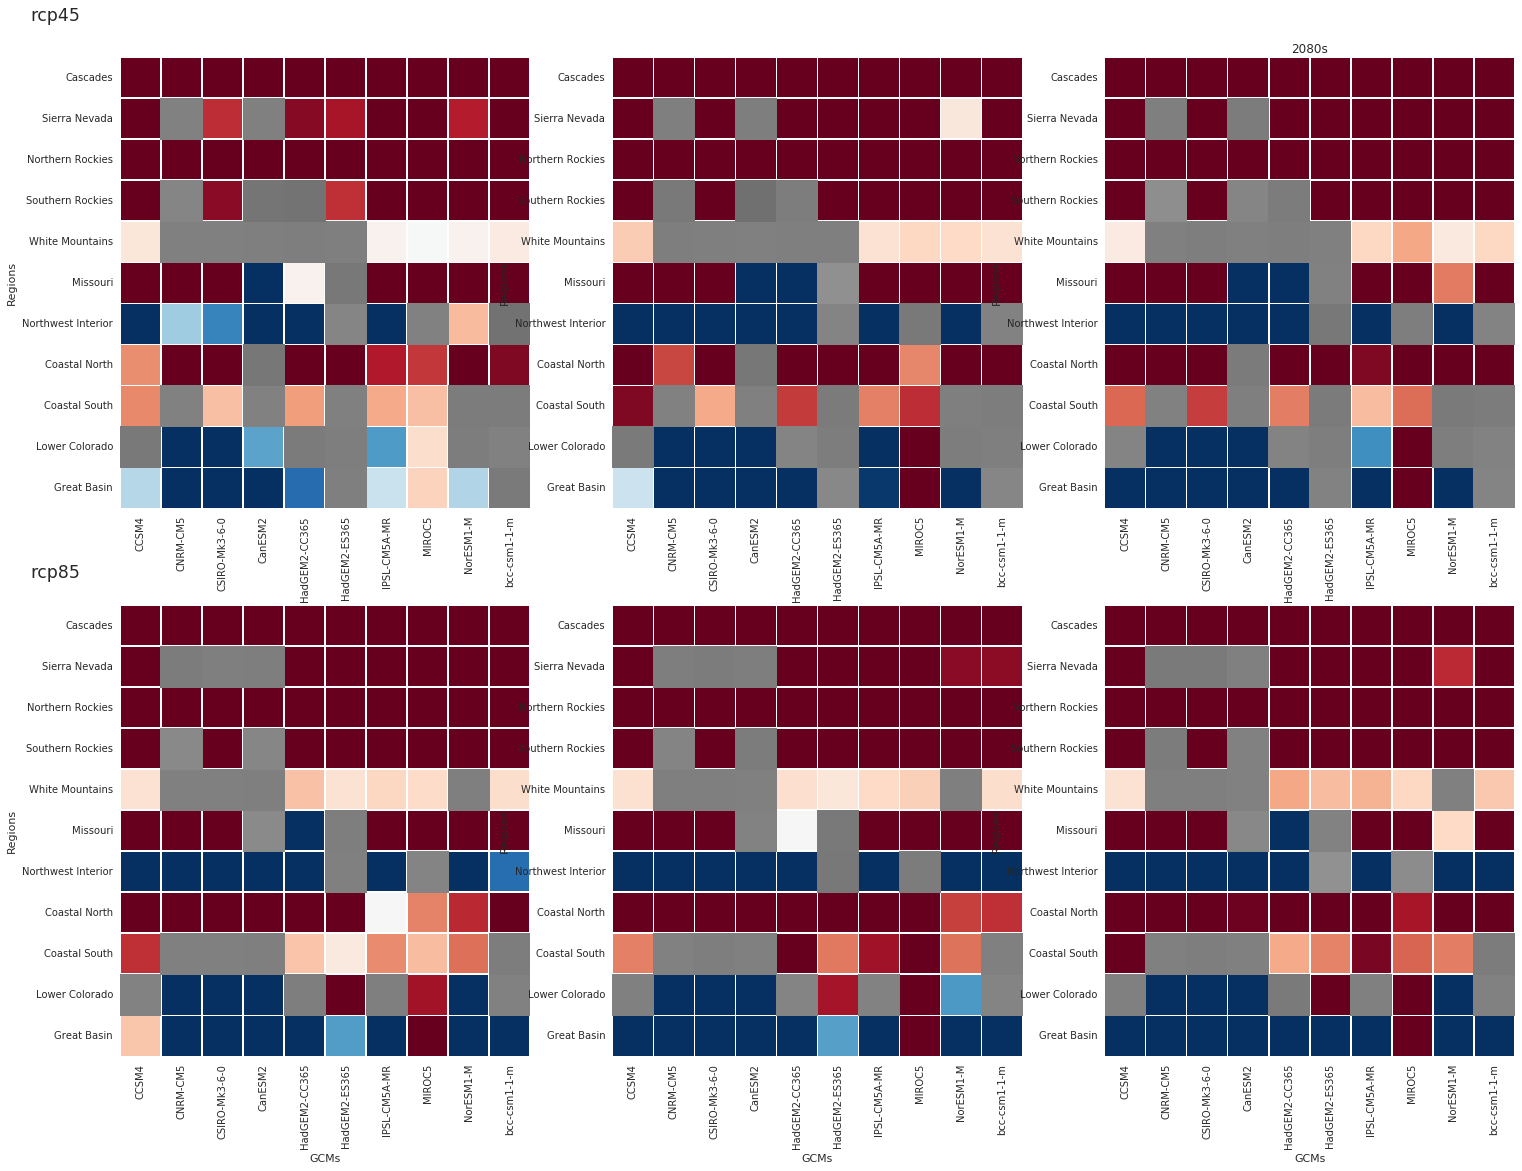

In [20]:
lt = 25
rt = 18
fig = plt.figure(figsize=(lt,rt))

## 2020s rcp45 
df_pivot,diff_means,pvals_df,pvals = make_df_for_heatmap(models_10,basins_10,"rcp45","average",4,34)
# print(type(df_pivot.values[0,0]))
ax = fig.add_subplot(2,3,1)
img = sns.heatmap(df_pivot, annot=False, mask=pvals_df > 0.05, square=True, linewidths=.5,cmap='RdBu', cbar=False, cbar_kws={"extend": 'min'},vmin=-6,vmax=6)
# ax.set_title("2020s")
#ax = denote_stat_sig(pvals,diff_means,ax)
# maskk = pvals_df < 0.05
# sns.heatmap(df_pivot, mask=maskk, cbar=False,cmap='gray',annot=True,annot_kws={"size": "10","alpha":"0.0","text":"%.1d"})
sns.heatmap(df_pivot, mask=pvals_df < 0.05, cmap='gray', cbar=False)


## 2050s rcp45 
df_pivot,diff_means,pvals_df,pvals = make_df_for_heatmap(models_10,basins_10,"rcp45","average",34,64)
ax = fig.add_subplot(2,3,2)
# print(df_pivot) 
sns.heatmap(df_pivot, annot=False, cbar=False, mask=pvals_df > 0.05, square=True, linewidths=.5, cmap='RdBu', cbar_kws={"extend": 'min'}, vmin=-4, vmax=4)
# sns.heatmap(df_pivot, cbar=False )
# ax.set_title("2050s")
#ax = denote_stat_sig(pvals,diff_means,ax)
sns.heatmap(df_pivot, mask=pvals_df < 0.05, cbar=False,cmap='gray')

## 2080s rcp45 
df_pivot,diff_means,pvals_df,pvals = make_df_for_heatmap(models_10,basins_10,"rcp45","average",64,94)
ax = fig.add_subplot(2,3,3)
sns.heatmap(df_pivot, annot=False, cbar=False, mask=pvals_df > 0.05, square=True, linewidths=.5,cmap='RdBu',cbar_kws={"extend": 'min'},vmin=-4,vmax=4)
ax.set_title("2080s")
#ax = denote_stat_sig(pvals,diff_means,ax)
sns.heatmap(df_pivot, mask=pvals_df < 0.05, cbar=False,cmap='gray')

## 2020s rcp85 
df_pivot,diff_means,pvals_df,pvals = make_df_for_heatmap(models_10,basins_10,"rcp85","average",4,34)
ax = fig.add_subplot(2,3,4)
sns.heatmap(df_pivot, annot=False, cbar=False, mask=pvals_df > 0.05, square=True, linewidths=.5,cmap='RdBu',cbar_kws={"extend": 'min'},vmin=-4,vmax=4)
#ax = denote_stat_sig(pvals,diff_means,ax)
'''sns.heatmap(df_pivot, mask=pvals_df < 0.05, cbar=False,cmap='gray',
            annot=True,annot_kws={"size": "10","alpha":"0.0","text":"%.1d"})'''
sns.heatmap(df_pivot, mask=pvals_df < 0.05, cbar=False, cmap='gray')

## 2050s rcp85 
df_pivot,diff_means,pvals_df,pvals = make_df_for_heatmap(models_10,basins_10,"rcp85","average",34,64)
ax = fig.add_subplot(2,3,5)
sns.heatmap(df_pivot, annot=False, cbar=False, mask=pvals_df > 0.05, square=True, linewidths=.5,cmap='RdBu',cbar_kws={"extend": 'min'},vmin=-4,vmax=4)
#ax = denote_stat_sig(pvals,diff_means,ax)
sns.heatmap(df_pivot, mask=pvals_df < 0.05, cbar=False,cmap='gray')

## 2080s rcp85 
df_pivot,diff_means,pvals_df,pvals = make_df_for_heatmap(models_10,basins_10,"rcp85","average",64,94)
ax = fig.add_subplot(2,3,6)
sns.heatmap(df_pivot, annot=False, cbar=False, mask=pvals_df > 0.05, square=True, linewidths=.5,cmap='RdBu',cbar_kws={"extend": 'min'},vmin=-4,vmax=4)
#ax = denote_stat_sig(pvals,diff_means,ax)
sns.heatmap(df_pivot, mask=pvals_df < 0.05, cbar=False,cmap='gray')

fig.text(0.075, 0.5, 'rcp85', va='center', rotation='horizontal',size = 'x-large')
fig.text(0.075, 0.93, 'rcp45', va='center', rotation='horizontal',size = 'x-large')

## save plot
direc = '/raid9/gergel/agg_snowpack/plots/summer_sm'
plotname = 'heatmap_sm_gcms_30yr_changeinmeans_stat_sig_normalized' 
savepath = os.path.join(direc, plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath)